math final project- group 3

members: Narjes Amousoltani F., Aanandita Madan Chavan, Jorge Luis Galarraga Prince, Mark Kale, Abdullah Malik, Shreeya Shah, Sirjana Shrestha, Dushyant Tyagi

dataset link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

# dataset details must be added here

# preprocessing section

Importing all the libraries and methods

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
df = pd.read_csv('Hotel_Reservations.csv')

In [5]:
df.head(20)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


## Taking care of missing data

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

## Encoding categorical data

### Encoding the Independent Variable

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

### Encoding the Dependent Variable

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

## Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# X_test[:, 3:] = sc.transform(X_test[:, 3:])

---
# Exploratory Data Analysis 

In [6]:
df.shape

(36275, 19)

##### Observation: We have too many features and few samples, taking into account the number of features.

In [7]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [9]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Observations:
The items below were dropped from the dataset, since they didn't increase the accuracy of the model, moreover, they were categorical items. 
- room_type_reserved
- type_of_meal_plan
- Booking_ID

---
# insights

In [10]:
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

**67.23% of the booking are not cancelled and 32.76 % of booking are cancelled**

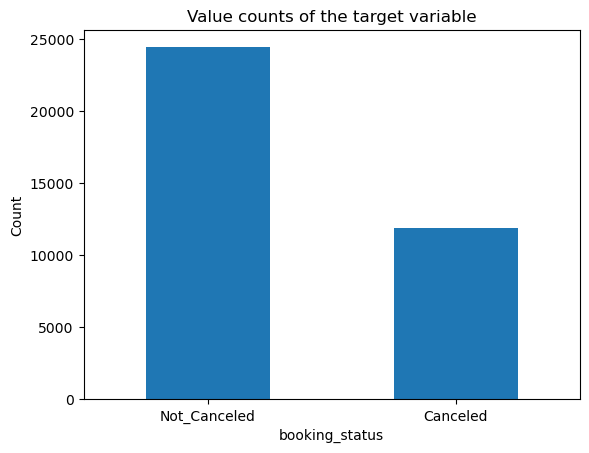

In [11]:
df.booking_status.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("booking_status")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

**Visualization of booking status**

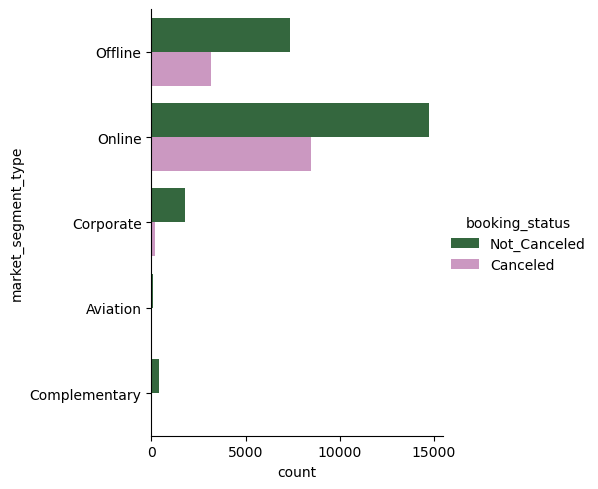

In [12]:
# Booking Status based on Market segmentation
sns.catplot(y="market_segment_type", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Online booking are canceled more than offline, followed by corporate market segment

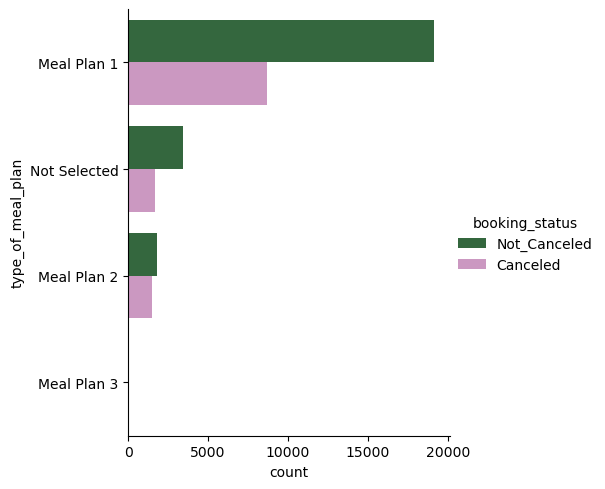

In [13]:
sns.catplot(y="type_of_meal_plan", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Meal Plan 1 is the most popular type of meal_plan

<AxesSubplot: xlabel='room_type_reserved', ylabel='avg_price_per_room'>

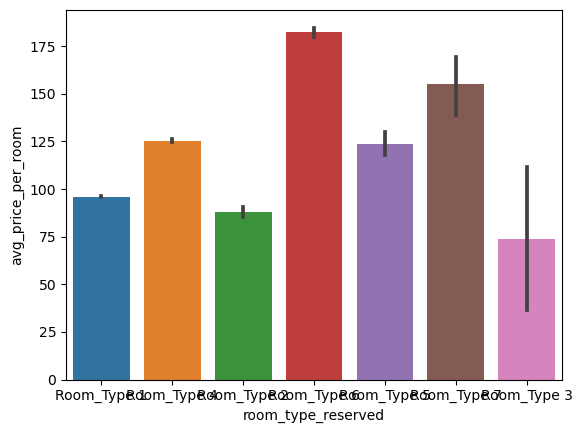

In [14]:
# Average Price per room based on room type reserved
sns.barplot(data=df, x="room_type_reserved", y="avg_price_per_room")

In [15]:
df['market_segment_type'] = LabelEncoder().fit_transform(df['market_segment_type'])

19

In [16]:
# df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True)
# df.drop(['Booking_ID', 'type_of_meal_plan'], axis=1, inplace=True) no parameters accuracy score 0.7754295690526509 and 0.7583386933749885 with huber
# df.drop(['Booking_ID', 'room_type_reserved'], axis=1, inplace=True) no parameters accuracy score 0.67 and 0.7746025911972801 with huber
# df.drop(['Booking_ID'], axis=1, inplace=True) no parameters accuracy score 0.7665165855003216 and 0.771110906919048 with huber
# df.drop(['Booking_ID'], axis=1, inplace=True)
# df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True) no parameters accuracy score 0.7723973169162914 and 0.7655058347882018 with huber
df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True)

In [61]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']
num_feats = df.shape[1]-1

In [62]:
num_feats

15

In [52]:
df.shape

(36275, 16)

In [47]:
feature_name = list(X.columns)

In [48]:
feature_name

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

---
# Feature Selection

In [ ]:
# Correlation among the variables
corrmat = df.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [15, 15]
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
len(df.columns)

16

In [23]:
X.shape, y.shape

((36275, 15), (36275,))

In [24]:
X.shape[1]

15

In [ ]:
feature_name = X.columns.tolist()
feature_name

**Chi-square**

In [63]:
def chi_squared_selector(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    return chi_support, chi_feature

In [122]:
chi_support, chi_feature = chi_squared_selector(X, y, num_feats)
chi_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**RFE**

In [65]:
def rfe_selector(X, y, num_feats):
    X_train = MinMaxScaler().fit_transform(X)
    lr = LogisticRegression(solver='lbfgs')
    rfe_lr = RFE(estimator=lr, 
             n_features_to_select=5,
             step=1,
             verbose=5)
    rfe_lr = rfe_lr.fit(X_train, y)
    rfe_lr_support = rfe_lr.get_support()
    rfe_lr_feature = X.loc[:, rfe_lr_support].columns.tolist()
    return rfe_lr_support, rfe_lr_feature

In [123]:
rfe_lr_support, rfe_lr_feature = rfe_selector(X, y, num_feats)
rfe_lr_feature

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


['required_car_parking_space',
 'lead_time',
 'market_segment_type',
 'avg_price_per_room',
 'no_of_special_requests']

**Logistic Regression (Lasso)**

In [67]:
def embedded_log_reg_selector(X, y, num_feats):
    logreg = LogisticRegression(penalty='l1', solver='liblinear')
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=50000), max_features=num_feats)
    embedded_lr_selector = embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()
    return embedded_lr_support, embedded_lr_feature

In [125]:
embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
embedded_lr_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**Tree based Randonm Forest**

In [69]:
def embedded_rf_selector(X, y, num_feats):
    rf = RandomForestClassifier(n_estimators=100)
    embedded_rf_selector = SelectFromModel(rf, 
                           max_features=num_feats)
    embedded_rf_selector = embedded_rf_selector.fit(X, y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    return embedded_rf_support, embedded_rf_feature

In [126]:
embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
embedded_rf_feature

['lead_time',
 'arrival_month',
 'arrival_date',
 'avg_price_per_room',
 'no_of_special_requests']

**Tree based LightGBM**

In [71]:
def embedded_lgbm_selector(X, y, num_feats):
    lgbmc = LGBMClassifier(n_estimators=500,
                           learning_rate=0.05,
                           num_leaves=32,
                           colsample_bytree=0.2,
                           reg_alpha=3,
                           reg_lambda=1,
                           min_split_gain=0.01,
                           min_child_weight=40)
    embedded_lgbm_selector = SelectFromModel(lgbmc, 
                                             max_features=num_feats)
    embedded_lgbm_selector = embedded_lgbm_selector.fit(X, y)
    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:, embedded_lgbm_support].columns.tolist()
    
    return embedded_lgbm_support, embedded_lgbm_feature

In [72]:
embedded_lgbm_selector(X, y, num_feats)

(array([False, False, False,  True, False,  True, False,  True,  True,
        False, False, False, False,  True, False]),
 ['no_of_week_nights',
  'lead_time',
  'arrival_month',
  'arrival_date',
  'avg_price_per_room'])

In [127]:
def autoFeatureSelector(dataset_path, methods=[]):
    if 'chi-square' in methods:
        chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
    if 'rfe' in methods:
        rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
    if 'log-reg' in methods:
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
    if 'rf' in methods:
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
    if 'lgbm' in methods:
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)
    
    
    pd.set_option('display.max_rows', None)

    
    feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})

    feature_selection_df['Total'] = feature_selection_df.sum(axis=1)
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    feature_selection_df.head(num_feats)

    return feature_selection_df

In [128]:
best_features = autoFeatureSelector(dataset_path="Hotel_Reservations.csv", methods=['chi-square', 'rfe', 'log-reg', 'rf', 'lgbm'])
best_features.head(10)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


/tmp/ipykernel_43115/3123419553.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_selection_df['Total'] = feature_selection_df.sum(axis=1)


,Feature,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,lead_time,True,True,True,True,True,5
2,avg_price_per_room,True,True,True,True,True,5
3,no_of_special_requests,True,True,True,True,False,4
4,arrival_month,True,False,True,True,True,4
5,arrival_date,True,False,True,True,True,4
6,required_car_parking_space,True,True,True,False,False,3
7,no_of_week_nights,True,False,True,False,True,3
8,market_segment_type,True,True,True,False,False,3
9,repeated_guest,True,False,True,False,False,2
10,no_of_weekend_nights,True,False,True,False,False,2


---
### Training the model 

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [131]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

---
### Use of GridSearchCV

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
param_grid = {'loss':['hinge', 'log_loss', 'modified_huber'], 'alpha': [0.001, 0.0001]}

In [137]:
SGD_model = SGDClassifier()

In [138]:
grid = GridSearchCV(SGD_model, param_grid)

In [139]:
%time
grid.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.001, 0.0001],
                         'loss': ['hinge', 'log_loss', 'modified_huber']})

In [140]:
model = grid.best_estimator_
model

SGDClassifier(alpha=0.001)

In [141]:
yfit = model.predict(X_test)

In [142]:
confusion_matrix(y_test, yfit)

array([[1585, 1937],
       [ 540, 6821]])

In [143]:
accuracy_score(y_test, yfit)

0.7723973169162914

---
### Fitting the model

In [144]:
SGD_model.fit(X_train, y_train)

SGDClassifier()

In [145]:
SGD_predictions = SGD_model.predict(X_test)

In [146]:
confusion_matrix(y_test, SGD_predictions)

array([[1200, 2322],
       [ 288, 7073]])

In [147]:
accuracy_score(y_test, SGD_predictions)

0.7601764219424791

In [148]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8273

##### Testing with different parameters 

In [149]:
SGD_model2 = SGDClassifier(loss='modified_huber', alpha=0.001)

In [150]:
SGD_model2.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='modified_huber')

In [151]:
SGD_predictions2 = SGD_model2.predict(X_test)

In [152]:
confusion_matrix(y_test, SGD_predictions2)

array([[2479, 1043],
       [1781, 5580]])

In [153]:
accuracy_score(y_test, SGD_predictions2)

0.7405127262703298

In [154]:
accuracy_score(y_test, SGD_predictions2, normalize=False)

8059

---

In [155]:
# loss='log_loss' alpha=0.0001
SGD_model3 = SGDClassifier(loss='log_loss', alpha=0.0001)

In [156]:
SGD_model3.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [157]:
SGD_predictions3 = SGD_model3.predict(X_test)

In [158]:
confusion_matrix(y_test, SGD_predictions3)

array([[1502, 2020],
       [ 498, 6863]])

In [159]:
accuracy_score(y_test, SGD_predictions3)

0.7686299733529358

---
# Random Forest Regression

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

### Predicting a new result

In [ ]:
#regressor.predict([[6.5]])

### Visualising the Random Forest Regression results (higher resolution)

In [ ]:
# X_grid = np.arange(min(X), max(X), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('Truth or Bluff (Random Forest Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

---